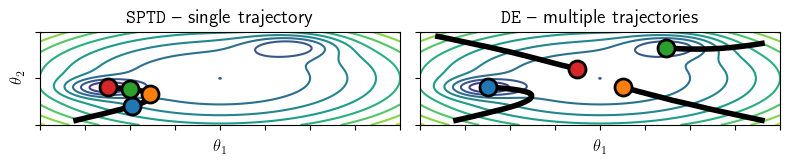

In [49]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
})

# --- Asymmetric two‑well loss -------------------------------------------
def loss(x, y):
    base = 0.4 * (x**2 + 0.8 * y**2)
    well1 = -1.5 * np.exp(-((x + 1.3)**2 + (y + 0.4)**2) / 0.15)
    well2 = -1.2 * np.exp(-((x - 0.8)**2 + (y - 1.4)**2) / 0.25)
    return base + well1 + well2

def grad_loss(x, y):
    dLdx = 0.8 * x
    dLdy = 0.64 * y
    g1 = np.exp(-((x + 1.3)**2 + (y + 0.4)**2) / 0.15)
    dLdx += -1.5 * g1 * (-2*(x + 1.3)/0.15)
    dLdy += -1.5 * g1 * (-2*(y + 0.4)/0.15)
    g2 = np.exp(-((x - 0.8)**2 + (y - 1.4)**2) / 0.25)
    dLdx += -1.2 * g2 * (-2*(x - 0.8)/0.25)
    dLdy += -1.2 * g2 * (-2*(y - 1.4)/0.25)
    return dLdx, dLdy

def sgd_path(start, steps=60, lr=0.04, noise=0.03):
    xs, ys = [start[0]], [start[1]]
    x, y = start
    for _ in range(steps):
        gx, gy = grad_loss(x, y)
        x -= lr * (gx + noise * np.random.randn())
        y -= lr * (gy + noise * np.random.randn())
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# --- Meshgrid ------------------------------------------------------------
grid_x = np.linspace(-2, 2, 400)
grid_y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(grid_x, grid_y)
Z = loss(X, Y)

# --- Compute trajectories -----------------------------------------------
traj_sp = sgd_path(start=(-1.6, -1.8))
n_steps = len(traj_sp[0]) - 1
# markers at 25%, 50%, 75%, 100%
highlight_sp = [int(0.25 * n_steps), int(0.5 * n_steps), int(0.59 * n_steps), n_steps]
sp_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Deep Ensemble starts
starts_de = [(-1.6, -1.8), (1.8, 1.5), (-1.8, 1.8), (1.8, -1.8)]
trajs_de = [sgd_path(s) for s in starts_de]
de_colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:orange']

# --- Plot panels ---------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(8, 1.75), sharex=True, sharey=True)

# SPTD panel
ax = axes[0]
ax.contour(X, Y, Z, levels=10, cmap='viridis')
ax.plot(traj_sp[0], traj_sp[1], color='black', lw=4)
for idx, col in zip(highlight_sp, sp_colors):
    ax.scatter(traj_sp[0][idx], traj_sp[1][idx],
               marker='o', color=col, s=150, edgecolors='black', linewidths=2, zorder=4)
ax.set_title(r"\texttt{SPTD} – single trajectory", fontsize=14)
ax.set_xlabel(r"$\theta_1$", fontsize=12)
ax.set_ylabel(r"$\theta_2$", fontsize=12)
ax.set_yticklabels([])
ax.set_xticklabels([])

# DE panel
ax = axes[1]
ax.contour(X, Y, Z, levels=10, cmap='viridis')
for (xs, ys), col in zip(trajs_de, de_colors):
    ax.plot(xs, ys, color='black', lw=4)
    ax.scatter(xs[-1], ys[-1],
               marker='o', color=col, s=150, edgecolors='black', linewidths=2, zorder=4)
ax.set_title(r"\texttt{DE} – multiple trajectories", fontsize=14)
ax.set_xlabel(r"$\theta_1$", fontsize=12)
ax.set_yticklabels([])
ax.set_xticklabels([])


fig.tight_layout()
plt.savefig("sptd_de.pdf", bbox_inches='tight')
plt.show()